# Fig 1

## Main part

In [1]:
import numpy as np
import pandas as pd
from numpy import savetxt
import time
start_time = time.time()
import tracemalloc
tracemalloc.start()


def A_x(N, t_, r_):
    A_mat = np.zeros((2*N, 2*N))
    np.fill_diagonal(A_mat, 1./t_)
    for i in range(0, N):
        A_mat[2*i, 2*i+1] = r_/t_
        A_mat[2*i+1, 2*i] = r_/t_
    return A_mat

def B_x(N, t_, r_):
    B_mat = np.zeros((2*N, 2*N))
    np.fill_diagonal(B_mat, 1./r_)
    for i in range(0, N-1):
        B_mat[2*i+1, 2*i+2] = t_/r_
        B_mat[2*i+2, 2*i+1] = t_/r_
    B_mat[0, 2*N-1] = t_/r_
    B_mat[2*N-1, 0] = t_/r_
    return B_mat

def VU_mat_gen(Lx):
    for index_Lx in range(Lx):
        V_x_Dis_exp = np.exp(V_x_Dis[ index_Lx*2*N:(index_Lx+1)*2*N ]*1j)
        U_x_Dis_exp = np.exp(U_x_Dis[ index_Lx*2*N:(index_Lx+1)*2*N ]*1j)
        V_x_mat_2D_diag = np.diag(V_x_Dis_exp)
        U_x_mat_2D_diag = np.diag(U_x_Dis_exp)
        #V_x_sum.append(V_x_mat_2D_diag)
        #U_x_sum.append(U_x_mat_2D_diag)
        yield (V_x_mat_2D_diag, U_x_mat_2D_diag)

def T_tr_x(index_Lx):
    VU = next( VU_mat ) # use yield
    #T_x_mat = np.dot( A_mat, U_x_sum[index_Lx] )
    T_x_mat = np.dot( A_mat, VU[1] ) # use yield
    #T_x_mat = np.dot( V_x_sum[index_Lx], T_x_mat)
    T_x_mat = np.dot( VU[0], T_x_mat) # use yield
    T_x_mat = np.dot( B_mat, T_x_mat)
    return T_x_mat

def R_mtr_x(q):
    l = int(Lx/q)
    Q_inter = np.identity(2*N)
    for j in range(1, int(l + 1)):
        Eq_lef = np.identity(2*N)
        for k in range(j*q+1-q-1, j*q):
            Eq_lef = np.dot( T_tr_x(k), Eq_lef)# Method 2
            
        Eq_lef = np.dot(Eq_lef, Q_inter) 
        Q_mtr, R_mtr = np.linalg.qr(Eq_lef)
        Q_inter = Q_mtr
        yield R_mtr[N-1, N-1]

def D_k_N(k):
    sum = 0
    for j in range(k*r-r+1, k*r+1):
        sum += (1.0/p)*np.log(np.abs( next( R_N ) )) # use yield
    return sum

def Gamma_N_ad(q):
    sum = 0
    sum_sq = 0
    for k_index in range(1,s+1):
        D_kN = D_k_N(k_index)
        sum += D_kN/s
        sum_sq += D_kN**2/s
    return sum, sum_sq

N = 16
Lx = 60
q = 6
r = 5
p = q*r
s = int(Lx/p)

x_index = np.linspace(-0.2, 0.2, 31)
Gamma = []
err = []

V_x_Dis = np.random.uniform(0, 2*np.pi, size = Lx*2*N)
U_x_Dis = np.random.uniform(0, 2*np.pi, size = Lx*2*N)
#V_x_sum = []
#U_x_sum = []

for x in x_index:
    t_ = 1./np.sqrt(np.exp(2*x) + 1)
    r_ = np.sqrt(1 - t_**2)
    A_mat = A_x(N, t_, r_)
    B_mat = B_x(N, t_, r_)
    VU_mat = VU_mat_gen(Lx) # use yield

    R_N = R_mtr_x(q) # use yield
    
    gamma_bar, gamma_sq_bar = Gamma_N_ad(q)

    gamma_err = np.sqrt( np.abs( (gamma_sq_bar - gamma_bar**2)/(s-1) ) )
    Gamma.append( N*np.abs(gamma_bar) )
    err.append( N*gamma_err )

end_time = time.time()
print(end_time - start_time,'s')

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

savetxt('QHE_L-NUM.csv', Gamma, delimiter=',')

0.20814037322998047 s
Current memory usage is 0.153207MB; Peak was 0.206624MB


## Figure part

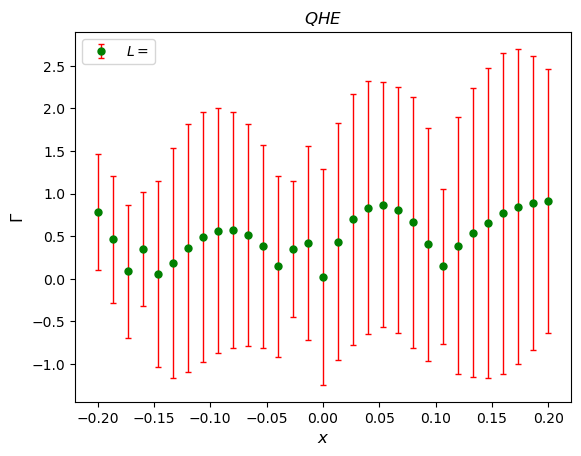

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
#import resource 
%matplotlib inline

#plt.figure(figsize=(16,12))
#plt.scatter(x_index, Gamma, color = 'red', s=15, label = r'$L=16$')
plt.errorbar(x_index, Gamma, yerr=err, fmt='o', ecolor='red', color='green', ms=5, elinewidth=1, capsize=2, label = r'$L = $')


plt.legend()
#plt.grid()
plt.xlabel(r'$x$',size=12)
plt.ylabel(r'$\Gamma$',size=12)
plt.title(r'$QHE$',size=12)
#plt.xlim(14.5,18.5)
#plt.ylim(0.8,2.8)
plt.show()

# HPC result

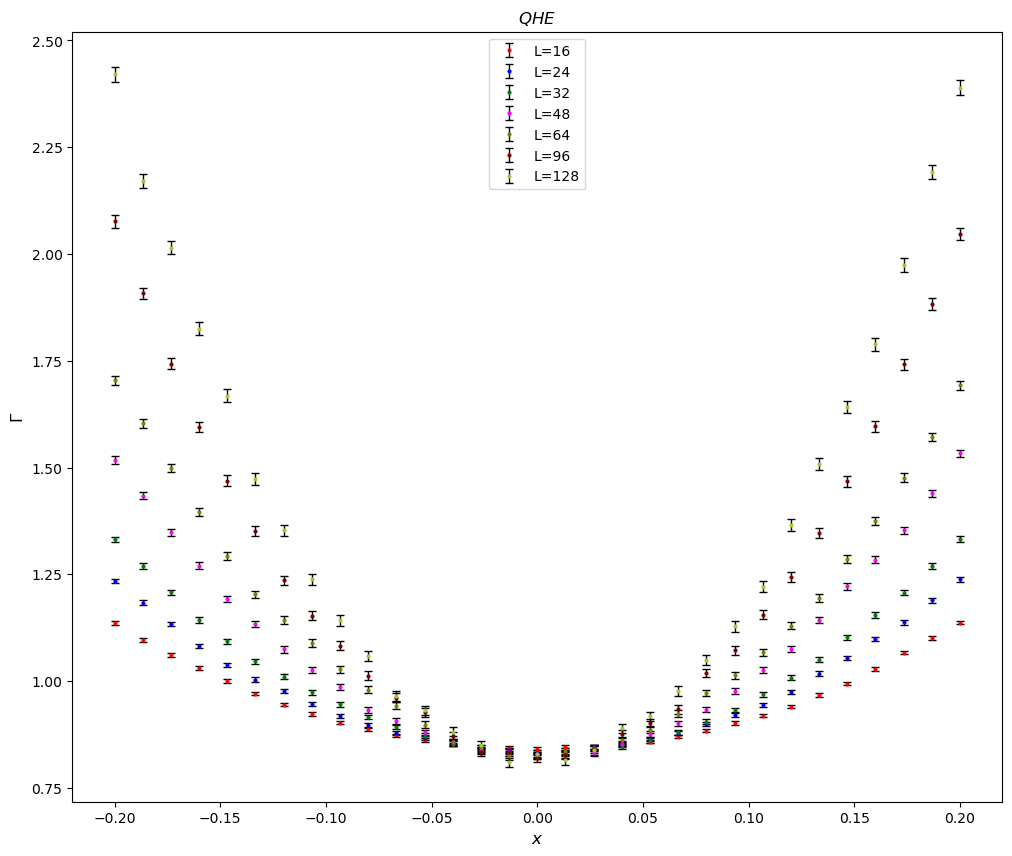

In [4]:
import numpy as np
import pandas as pd
from numpy import savetxt
#import tracemalloc
import time
from numpy import loadtxt
import matplotlib.pyplot as plt
%matplotlib inline

color = ['red', 'blue', 'green', 'magenta', 'olive', 'maroon', 'yellowgreen'] 
label_scatter = ['L=16', 'L=24', 'L=32', 'L=48', 'L=64', 'L=96', 'L=128']
QHE16 = loadtxt('QHE_L-16.csv', delimiter=',')
QHE16_err = loadtxt('QHE_L-16-err.csv', delimiter=',')
QHE24 = loadtxt('QHE_L-24.csv', delimiter=',')
QHE24_err = loadtxt('QHE_L-24-err.csv', delimiter=',')
QHE32 = loadtxt('QHE_L-32.csv', delimiter=',')
QHE32_err = loadtxt('QHE_L-32-err.csv', delimiter=',')
QHE48 = loadtxt('QHE_L-48.csv', delimiter=',')
QHE48_err = loadtxt('QHE_L-48-err.csv', delimiter=',')
QHE64 = loadtxt('QHE_L-64.csv', delimiter=',')
QHE64_err = loadtxt('QHE_L-64-err.csv', delimiter=',')
QHE96 = loadtxt('QHE_L-96.csv', delimiter=',')
QHE96_err = loadtxt('QHE_L-96-err.csv', delimiter=',')
QHE128 = loadtxt('QHE_L-128.csv', delimiter=',')
QHE128_err = loadtxt('QHE_L-128-err.csv', delimiter=',')
data_QHE = [QHE16, QHE24, QHE32, QHE48, QHE64, QHE96, QHE128]
data_QHE_err = [QHE16_err, QHE24_err, QHE32_err, QHE48_err, QHE64_err, QHE96_err, QHE128_err]

plt.figure(figsize=(12,10))
for i in range(len(data_QHE)):
    plt.errorbar(x_index, data_QHE[i], yerr=data_QHE_err[i], fmt='o', ecolor='black', color=color[i], ms=2, elinewidth=1, capsize=3, label=label_scatter[i])

plt.legend()
#plt.grid()
plt.xlabel(r'$x$',size=12)
plt.ylabel(r'$\Gamma$',size=12)
plt.title(r'$QHE$',size=12)
#plt.xlim(14.5,18.5)
#plt.ylim(0.8,2.8)
plt.show()

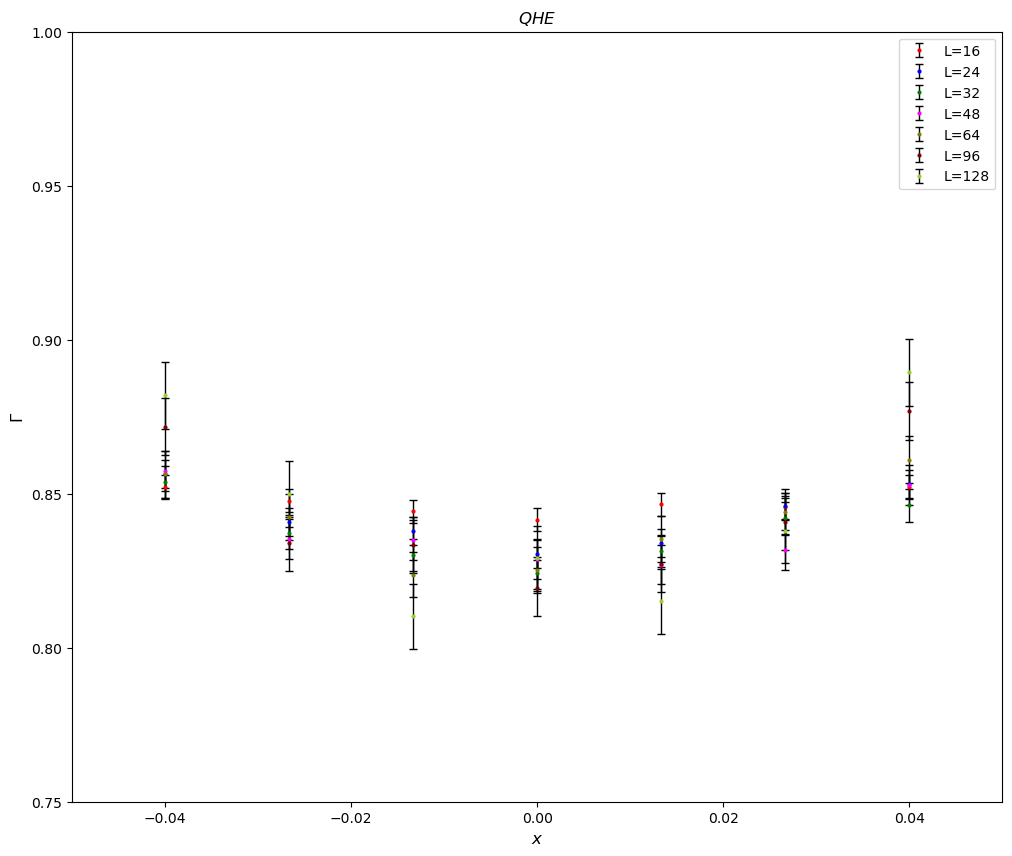

In [5]:
import numpy as np
import pandas as pd
from numpy import savetxt
#import tracemalloc
import time
from numpy import loadtxt
import matplotlib.pyplot as plt
%matplotlib inline

color = ['red', 'blue', 'green', 'magenta', 'olive', 'maroon', 'yellowgreen'] 
label_scatter = ['L=16', 'L=24', 'L=32', 'L=48', 'L=64', 'L=96', 'L=128']
QHE16 = loadtxt('QHE_L-16.csv', delimiter=',')
QHE16_err = loadtxt('QHE_L-16-err.csv', delimiter=',')
QHE24 = loadtxt('QHE_L-24.csv', delimiter=',')
QHE24_err = loadtxt('QHE_L-24-err.csv', delimiter=',')
QHE32 = loadtxt('QHE_L-32.csv', delimiter=',')
QHE32_err = loadtxt('QHE_L-32-err.csv', delimiter=',')
QHE48 = loadtxt('QHE_L-48.csv', delimiter=',')
QHE48_err = loadtxt('QHE_L-48-err.csv', delimiter=',')
QHE64 = loadtxt('QHE_L-64.csv', delimiter=',')
QHE64_err = loadtxt('QHE_L-64-err.csv', delimiter=',')
QHE96 = loadtxt('QHE_L-96.csv', delimiter=',')
QHE96_err = loadtxt('QHE_L-96-err.csv', delimiter=',')
QHE128 = loadtxt('QHE_L-128.csv', delimiter=',')
QHE128_err = loadtxt('QHE_L-128-err.csv', delimiter=',')
data_QHE = [QHE16, QHE24, QHE32, QHE48, QHE64, QHE96, QHE128]
data_QHE_err = [QHE16_err, QHE24_err, QHE32_err, QHE48_err, QHE64_err, QHE96_err, QHE128_err]

plt.figure(figsize=(12,10))
for i in range(len(data_QHE)):
    plt.errorbar(x_index, data_QHE[i], yerr=data_QHE_err[i], fmt='o', ecolor='black', color=color[i], ms=2, elinewidth=1, capsize=3, label=label_scatter[i])

plt.legend()
#plt.grid()
plt.xlabel(r'$x$',size=12)
plt.ylabel(r'$\Gamma$',size=12)
plt.title(r'$QHE$',size=12)
plt.xlim(-0.05,0.05)
plt.ylim(0.75,1.0)
plt.show()

# FSS Fit

L =  16
std err =  0.004186908260863253
nu =  4.186550732160294 

L =  24
std err =  0.005047822097107864
nu =  1.7129777459576623 

L =  32
std err =  0.005771788796929976
nu =  2.0955761618954143 

L =  48
std err =  0.00688198331622099
nu =  2.6283949190485516 

L =  64
std err =  0.007772081445889861
nu =  5.251564921251959 

L =  96
std err =  0.009214182153604294
nu =  2.735070157320145 

L =  128
std err =  0.010323629544527398
nu =  2.9090767672663485 

avg_nu =  2.651325114213711
std_avg_nu =  0.7318885929687312 

With out L=16 avg_nu =  2.3954541778892806
std_avg_nu =  0.40822564701635544 

With out L=16,128 avg_nu =  2.2927296600138667
std_avg_nu =  0.36968074770251347 

With out L=16, 128, 64 avg_nu =  2.6083665053716043
std_avg_nu =  0.7823168391100652 



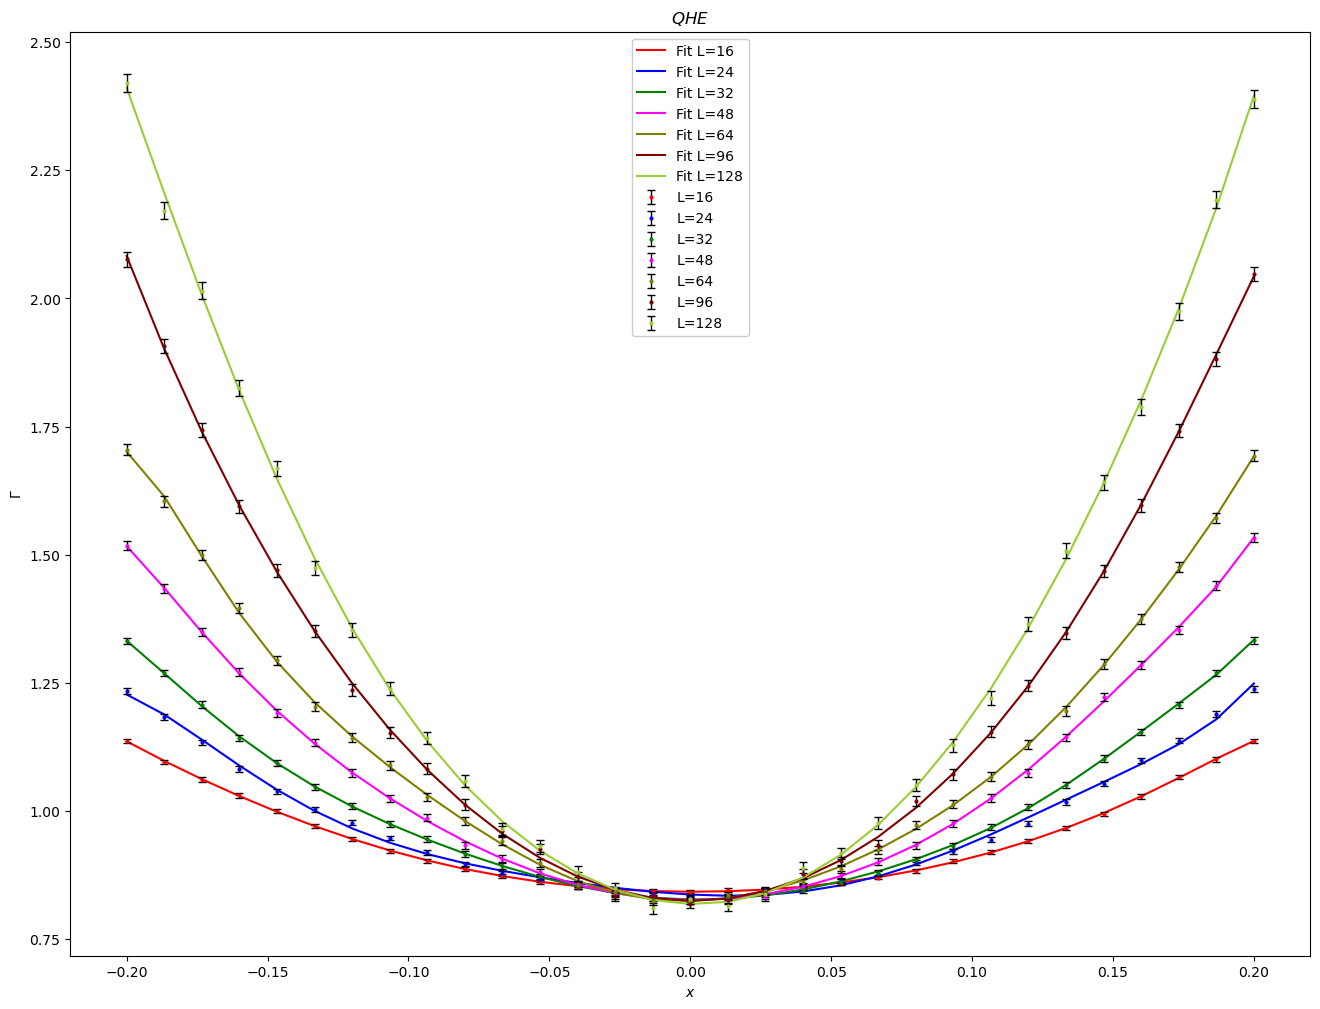

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op


'''
def F(x, alpha_1, alpha_2, a00, a01, a10, a11, a20, a21, a30, a31, a40, a41, a50, a51, a60, a61, b10, b11, b12, b13, b20, b21, b22):
    w = x
    p1 = (L**alpha_1)*( b10 + b11*w + b12*w*w + b13*w*w*w)
    p2 = (L**alpha_2)*( b20 + b21*w + b22*w*w)
    F_fit = a00 + a01*p2 + a10*p1 + a11*p1*p2 + a20*(p1**2) + a21*(p1**2)*p2 + a30*(p1**3) + a31*(p1**3)*p2 + \
            a40*(p1**4) + a41*(p1**4)*p2 + a50*(p1**5) + a51*(p1**5)*p2 + a60*(p1**6) + a61*(p1**6)*p2
    return F_fit
'''

'''
def F(x, alpha_1, alpha_2, a00, a01, a10, a11, a20, a21, a30, a31, a40, a41, a50, a51, a60, a61, b10, b11, b12, b13, b20, b21, b22, a_00, a_10, a_20, a_30, a_40, a_50, a_60):
    w = x
    p1 = (L**alpha_1)*( b10 + b11*w + b12*w*w + b13*w*w*w)
    p2 = (L**alpha_2)*( b20 + b21*w + b22*w*w)
    F_fit = a00 + a01*p2 + a10*p1 + a11*p1*p2 + a20*(p1**2) + a21*(p1**2)*p2 + a30*(p1**3) + a31*(p1**3)*p2 + \
            a40*(p1**4) + a41*(p1**4)*p2 + a50*(p1**5) + a51*(p1**5)*p2 + a60*(p1**6) + a61*(p1**6)*p2 \
            + a_00 + a_10*p1 + a_20*(p1**2) + a_30*(p1**3) + a_40*(p1**4) + a_50*(p1**5) + a_60*(p1**6)
    return F_fit
'''


def F(x, alpha_1, alpha_2, a00, a01, a10, a11, a20, a21, a30, a31, a40, a41, a50, a51, a60, a61, b10, b11, b12, b13, b20, b21, b22):
    w = x
    p1 = (L**alpha_1)*( b10 + b11*w + b12*w*w + b13*w*w*w)
    p2 = (L**alpha_2)*( b20 + b21*w + b22*w*w)
    F_fit = 2*a00 + a01*p2 + 2*a10*p1 + a11*p1*p2 + 2*a20*(p1**2) + a21*(p1**2)*p2 + 2*a30*(p1**3) + a31*(p1**3)*p2 + \
            2*a40*(p1**4) + a41*(p1**4)*p2 + 2*a50*(p1**5) + a51*(p1**5)*p2 + 2*a60*(p1**6) + a61*(p1**6)*p2
    return F_fit


  
x_fit = x_index
L_index = [16, 24, 32, 48, 64, 96, 128]

color = ['red', 'blue', 'green', 'magenta', 'olive', 'maroon', 'yellowgreen'] 
label_scatter = ['L=16', 'L=24', 'L=32', 'L=48', 'L=64', 'L=96', 'L=128']
label_fit = ['Fit L=16', 'Fit L=24', 'Fit L=32', 'Fit L=48', 'Fit L=64', 'Fit L=96', 'Fit L=128']
QHE16 = loadtxt('QHE_L-16.csv', delimiter=',')
QHE16_err = loadtxt('QHE_L-16-err.csv', delimiter=',')
QHE24 = loadtxt('QHE_L-24.csv', delimiter=',')
QHE24_err = loadtxt('QHE_L-24-err.csv', delimiter=',')
QHE32 = loadtxt('QHE_L-32.csv', delimiter=',')
QHE32_err = loadtxt('QHE_L-32-err.csv', delimiter=',')
QHE48 = loadtxt('QHE_L-48.csv', delimiter=',')
QHE48_err = loadtxt('QHE_L-48-err.csv', delimiter=',')
QHE64 = loadtxt('QHE_L-64.csv', delimiter=',')
QHE64_err = loadtxt('QHE_L-64-err.csv', delimiter=',')
QHE96 = loadtxt('QHE_L-96.csv', delimiter=',')
QHE96_err = loadtxt('QHE_L-96-err.csv', delimiter=',')
QHE128 = loadtxt('QHE_L-128.csv', delimiter=',')
QHE128_err = loadtxt('QHE_L-128-err.csv', delimiter=',')
data_QHE = [QHE16, QHE24, QHE32, QHE48, QHE64, QHE96, QHE128]
data_QHE_err = [QHE16_err, QHE24_err, QHE32_err, QHE48_err, QHE64_err, QHE96_err, QHE128_err]

#para_initial = [16.53, 0.63, -2.5, 0., 0., 0., 0., 0., 0., 0., 1.3, -0.3, 0., 0.]


plt.figure(figsize=(16,12))
nu = []
for i in range(len(data_QHE)):
    #if i!=0:
    if True:
        L = L_index[i]
        #popt, pcov = op.curve_fit(F, x_fit, data_QHE[i], p0=para_initial, maxfev = 100000)
        popt, pcov = op.curve_fit(F, x_fit, data_QHE[i], maxfev = 100000)
        y_new = F(x_index, *popt)
        plt.plot(x_index, y_new, color = color[i], label = label_fit[i])
        #plt.scatter(x_index, data_QHE[i], color = color[i], s=15, label = label_scatter[i], marker='o', facecolors='none')
        plt.errorbar(x_index, data_QHE[i], yerr=data_QHE_err[i], fmt='o', ecolor='black', color=color[i], ms=2, elinewidth=1, capsize=3, label=label_scatter[i])
        print('L = ', L)
        std_av = np.mean(data_QHE_err[i]/data_QHE[i])
        print('std err = ', std_av)
        print('nu = ', 1/popt[0] ,'\n')
        nu.append(1/popt[0])
        if i==4:
            nu[4] = np.sqrt(nu[4])
            #nu[4] = nu[4]/2
            #nu[4] = 2.015
            #True
        
            
print('avg_nu = ', np.mean(nu))
print('std_avg_nu = ', np.std(nu), '\n')

print('With out L=16 avg_nu = ', np.mean( nu[1:len(nu)] ) )
print('std_avg_nu = ', np.std( nu[1:len(nu)] ), '\n')

print('With out L=16,128 avg_nu = ', np.mean( nu[1:len(nu)-1] ) )
print('std_avg_nu = ', np.std( nu[1:len(nu)-1] ), '\n')

nu_ = []
nu_.append(nu[0])
nu_.append(nu[1])
nu_.append(nu[2])
nu_.append(nu[3])
nu_.append(nu[4])
nu_.append(nu[5])
#nu_.append(nu[6])
print('With out L=16, 128, 64 avg_nu = ', np.mean( nu_ ) )
print('std_avg_nu = ', np.std( nu_ ), '\n')

plt.xlabel(r'$x$')
plt.ylabel(r'$\Gamma$')
plt.title(r'$QHE$')
plt.legend(framealpha=1)
plt.savefig('QHE_HPC.eps', dpi=600, format='eps')
plt.show()

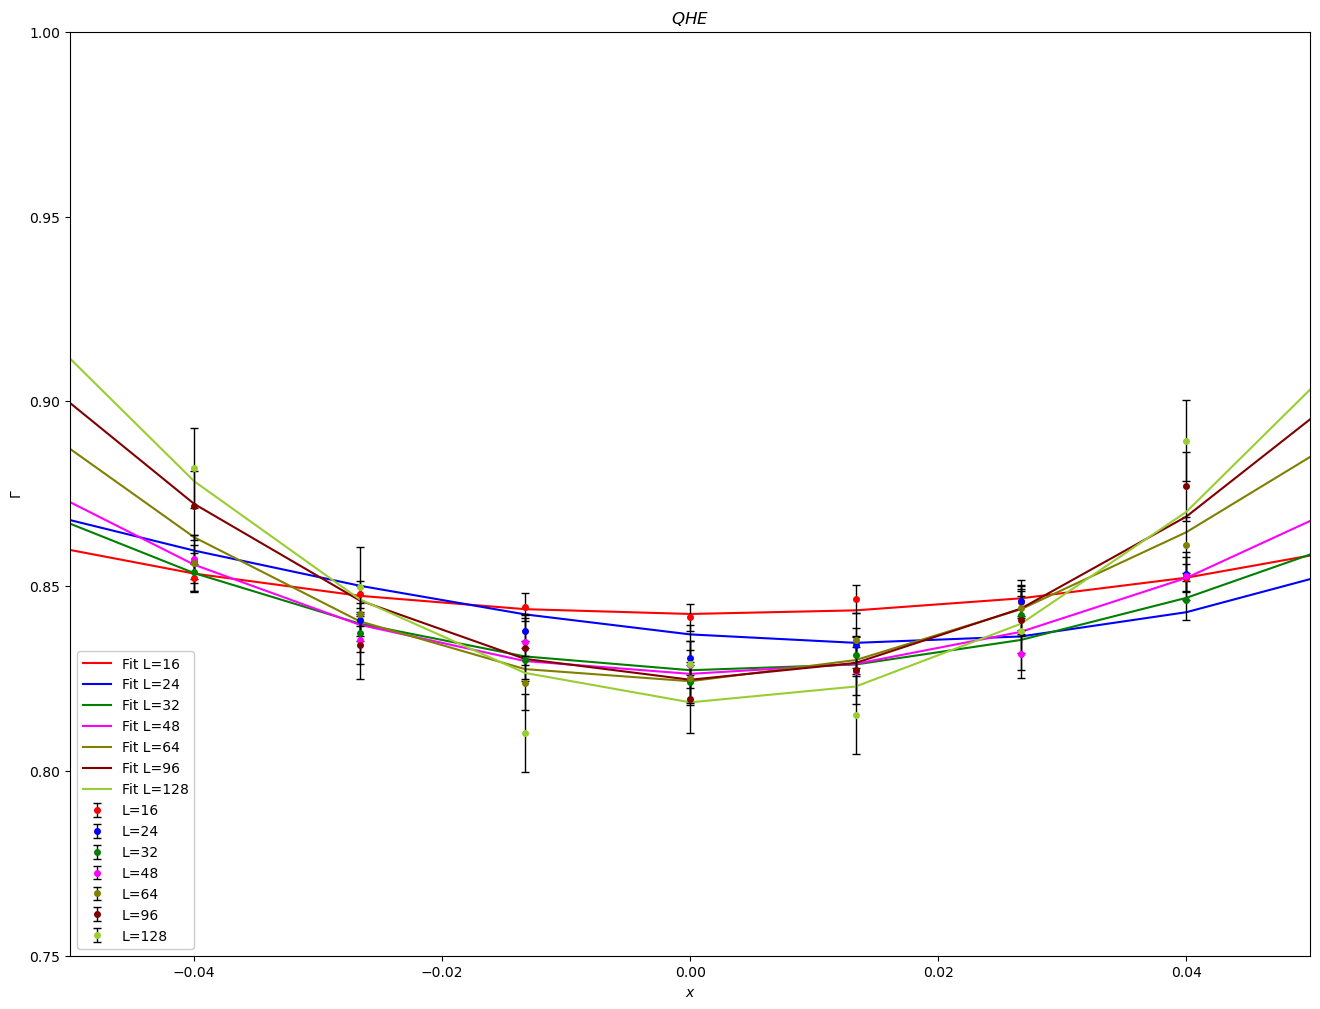

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

def F(x, alpha_1, alpha_2, a00, a01, a10, a11, a20, a21, a30, a31, a40, a41, a50, a51, a60, a61, b10, b11, b12, b13, b20, b21, b22):
    w = x
    p1 = (L**alpha_1)*( b10 + b11*w + b12*w*w + b13*w*w*w)
    p2 = (L**alpha_2)*( b20 + b21*w + b22*w*w)
    F_fit = 2*a00 + a01*p2 + 2*a10*p1 + a11*p1*p2 + 2*a20*(p1**2) + a21*(p1**2)*p2 + 2*a30*(p1**3) + a31*(p1**3)*p2 + \
            2*a40*(p1**4) + a41*(p1**4)*p2 + 2*a50*(p1**5) + a51*(p1**5)*p2 + 2*a60*(p1**6) + a61*(p1**6)*p2
    return F_fit


  
x_fit = x_index
L_index = [16, 24, 32, 48, 64, 96, 128]

color = ['red', 'blue', 'green', 'magenta', 'olive', 'maroon', 'yellowgreen'] 
label_scatter = ['L=16', 'L=24', 'L=32', 'L=48', 'L=64', 'L=96', 'L=128']
label_fit = ['Fit L=16', 'Fit L=24', 'Fit L=32', 'Fit L=48', 'Fit L=64', 'Fit L=96', 'Fit L=128']
QHE16 = loadtxt('QHE_L-16.csv', delimiter=',')
QHE16_err = loadtxt('QHE_L-16-err.csv', delimiter=',')
QHE24 = loadtxt('QHE_L-24.csv', delimiter=',')
QHE24_err = loadtxt('QHE_L-24-err.csv', delimiter=',')
QHE32 = loadtxt('QHE_L-32.csv', delimiter=',')
QHE32_err = loadtxt('QHE_L-32-err.csv', delimiter=',')
QHE48 = loadtxt('QHE_L-48.csv', delimiter=',')
QHE48_err = loadtxt('QHE_L-48-err.csv', delimiter=',')
QHE64 = loadtxt('QHE_L-64.csv', delimiter=',')
QHE64_err = loadtxt('QHE_L-64-err.csv', delimiter=',')
QHE96 = loadtxt('QHE_L-96.csv', delimiter=',')
QHE96_err = loadtxt('QHE_L-96-err.csv', delimiter=',')
QHE128 = loadtxt('QHE_L-128.csv', delimiter=',')
QHE128_err = loadtxt('QHE_L-128-err.csv', delimiter=',')
data_QHE = [QHE16, QHE24, QHE32, QHE48, QHE64, QHE96, QHE128]
data_QHE_err = [QHE16_err, QHE24_err, QHE32_err, QHE48_err, QHE64_err, QHE96_err, QHE128_err]

#para_initial = [16.53, 0.63, -2.5, 0., 0., 0., 0., 0., 0., 0., 1.3, -0.3, 0., 0.]


plt.figure(figsize=(16,12))
nu = []
for i in range(len(data_QHE)):
    #if i!=0:
    if True:
        L = L_index[i]
        #popt, pcov = op.curve_fit(F, x_fit, data_QHE[i], p0=para_initial, maxfev = 100000)
        popt, pcov = op.curve_fit(F, x_fit, data_QHE[i], maxfev = 100000)
        y_new = F(x_index, *popt)
        plt.plot(x_index, y_new, color = color[i], label = label_fit[i])
        #plt.scatter(x_index, data_QHE[i], color = color[i], s=15, label = label_scatter[i], marker='o', facecolors='none')
        plt.errorbar(x_index, data_QHE[i], yerr=data_QHE_err[i], fmt='o', ecolor='black', color=color[i], ms=4, elinewidth=1, capsize=3, label=label_scatter[i])
        #print('L = ', L)
        std_av = np.mean(data_QHE_err[i]/data_QHE[i])
        #print('std err = ', std_av)
        #print('nu = ', 1/popt[0] ,'\n')
        nu.append(1/popt[0])
        #if i==4:
        #    nu[4] = np.sqrt(nu[4])
        
'''          
print('avg_nu = ', np.mean(nu))
print('std_avg_nu = ', np.std(nu), '\n')

print('With out L=16 avg_nu = ', np.mean( nu[1:len(nu)] ) )
print('std_avg_nu = ', np.std( nu[1:len(nu)] ), '\n')

print('With out L=16,128 avg_nu = ', np.mean( nu[1:len(nu)-1] ) )
print('std_avg_nu = ', np.std( nu[1:len(nu)-1] ), '\n')

nu_ = []
nu_.append(nu[0])
nu_.append(nu[1])
nu_.append(nu[2])
nu_.append(nu[3])
nu_.append(nu[4])
nu_.append(nu[5])
nu_.append(nu[6])
print('With out L=16, 128, 64 avg_nu = ', np.mean( nu_ ) )
print('std_avg_nu = ', np.std( nu_ ), '\n')
'''

plt.xlabel(r'$x$')
plt.ylabel(r'$\Gamma$')
plt.title(r'$QHE$')
plt.legend(framealpha=1)

plt.xlim(-0.05, 0.05)
plt.ylim(0.75, 1.0)
plt.savefig('QHE_HPC_Near_Critical.eps', dpi=600, format='eps')
plt.show()